In [1]:
train_dir = 'D:/Documentos/Estudio/Maestría/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Train' 
val_dir = 'D:/Documentos/Estudio/Maestría/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Val' 
test_dir = 'D:/Documentos/Estudio/Maestría/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Test'

In [2]:
#ELEGIMOS LOS PARAMETROS
from keras.preprocessing.image import ImageDataGenerator
ih, iw = 100, 100 #tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

num_class = 2 #cuantas clases 
#epochs = 15 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros

batch_size = 32 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 21715 #numero de imagenes en train
num_test = 6788 #numero de imagenes en test
num_val=5417

epoch_steps = num_train // batch_size 
test_steps = num_test // batch_size


Using TensorFlow backend.


In [3]:
#LEEMOS LAS IMÁGENES 

img_height, img_width=ih, iw

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as training data

validation_generator = train_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

test_generator = train_datagen.flow_from_directory(
    test_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

Found 14507 images belonging to 2 classes.
Found 3615 images belonging to 2 classes.
Found 4535 images belonging to 2 classes.


In [4]:
train=train_generator
val=validation_generator
test=test_generator

In [5]:
from keras.applications import vgg16 
from keras.models import Model 
import keras 


vgg = vgg16.VGG16(include_top=False, weights='imagenet',  
                                     input_shape=input_shape) 

# we have removed the final part of the classifier pertaining to the VGG-16 model 
#since we will be building our own classifier and leveraging VGG as a feature extractor
output = vgg.layers[-1].output 
output = keras.layers.Flatten()(output) 
vgg_model = Model(vgg.input, output) 

 
vgg_model.trainable = True 
set_trainable = False
 
for layer in vgg_model.layers: 
    if layer.name in ['block5_conv1', 'block4_conv1']: 
        set_trainable = True 
    if set_trainable: 
        layer.trainable = True 
    else: 
        layer.trainable = False 

In [6]:
import pandas as pd 
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\elium\.conda\envs\tfGPU\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x00000167F1C8F408>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x00000167E7CA9AC8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x00000167F1C6DE08>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x00000167E0A3DD48>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x00000167E0A35308>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x00000167E0A41F88>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x00000167E0A44448>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x00000167E0A44248>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x00000167E0A4E088>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x00000167E0A59548>,block3_conv3,False


In [7]:
from os import listdir
from os.path import isfile,isdir, join
import numpy

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from keras.optimizers import RMSprop 
from sklearn.model_selection import train_test_split

In [8]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer 
from keras.models import Sequential 
from keras import optimizers  
import tensorflow as tf

# build model architecture 
model = Sequential() 

model.add(vgg_model) 
model.add(Dense(512, activation='relu', input_dim=input_shape)) 
model.add(Dropout(0.25)) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(num_class, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy',f1_m,precision_m, recall_m])

In [16]:
history = model.fit_generator(train, steps_per_epoch=100, 
                              epochs=64,  
                              validation_data=val,   
                              validation_steps=50,  
                              verbose=1)

Epoch 1/64
100/100 [==============================] - 14s 143ms/step - loss: 0.6868 - accuracy: 0.5553 - f1_m: 0.6021 - precision_m: 0.5240 - recall_m: 0.7122 - val_loss: 0.6597 - val_accuracy: 0.7144 - val_f1_m: 0.7045 - val_precision_m: 0.5570 - val_recall_m: 0.9594
Epoch 2/64
100/100 [==============================] - 12s 122ms/step - loss: 0.6544 - accuracy: 0.6653 - f1_m: 0.6742 - precision_m: 0.5902 - recall_m: 0.7903 - val_loss: 0.6431 - val_accuracy: 0.8106 - val_f1_m: 0.7979 - val_precision_m: 0.7263 - val_recall_m: 0.8863
Epoch 3/64
100/100 [==============================] - 11s 113ms/step - loss: 0.6026 - accuracy: 0.7653 - f1_m: 0.7501 - precision_m: 0.7175 - recall_m: 0.7897 - val_loss: 0.5508 - val_accuracy: 0.7905 - val_f1_m: 0.7968 - val_precision_m: 0.7904 - val_recall_m: 0.8037
Epoch 4/64
100/100 [==============================] - 11s 110ms/step - loss: 0.5526 - accuracy: 0.8037 - f1_m: 0.7895 - precision_m: 0.7859 - recall_m: 0.7947 - val_loss: 0.5383 - val_accuracy:

Epoch 32/64
100/100 [==============================] - 7s 67ms/step - loss: 0.3810 - accuracy: 0.9325 - f1_m: 0.9304 - precision_m: 0.9319 - recall_m: 0.9294 - val_loss: 0.3570 - val_accuracy: 0.9537 - val_f1_m: 0.9542 - val_precision_m: 0.9572 - val_recall_m: 0.9512
Epoch 33/64
100/100 [==============================] - 7s 66ms/step - loss: 0.3694 - accuracy: 0.9437 - f1_m: 0.9428 - precision_m: 0.9437 - recall_m: 0.9422 - val_loss: 0.3432 - val_accuracy: 0.9506 - val_f1_m: 0.9493 - val_precision_m: 0.9511 - val_recall_m: 0.9475
Epoch 34/64
100/100 [==============================] - 7s 67ms/step - loss: 0.3747 - accuracy: 0.9394 - f1_m: 0.9380 - precision_m: 0.9384 - recall_m: 0.9378 - val_loss: 0.3954 - val_accuracy: 0.9593 - val_f1_m: 0.9581 - val_precision_m: 0.9593 - val_recall_m: 0.9569
Epoch 35/64
100/100 [==============================] - 7s 68ms/step - loss: 0.3715 - accuracy: 0.9425 - f1_m: 0.9399 - precision_m: 0.9429 - recall_m: 0.9372 - val_loss: 0.3624 - val_accuracy: 0.9

Epoch 63/64
100/100 [==============================] - 7s 66ms/step - loss: 0.3611 - accuracy: 0.9522 - f1_m: 0.9512 - precision_m: 0.9519 - recall_m: 0.9506 - val_loss: 0.3739 - val_accuracy: 0.9394 - val_f1_m: 0.9399 - val_precision_m: 0.9417 - val_recall_m: 0.9381
Epoch 64/64
100/100 [==============================] - 7s 68ms/step - loss: 0.3581 - accuracy: 0.9534 - f1_m: 0.9535 - precision_m: 0.9528 - recall_m: 0.9544 - val_loss: 0.3174 - val_accuracy: 0.9644 - val_f1_m: 0.9637 - val_precision_m: 0.9649 - val_recall_m: 0.9624


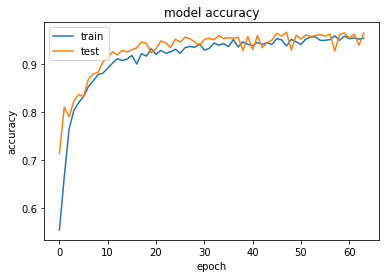

In [17]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

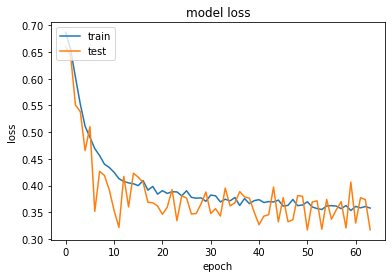

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

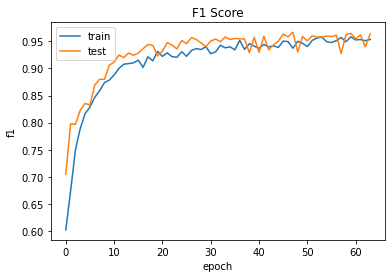

In [19]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('F1 Score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

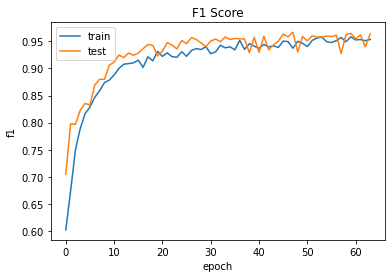

In [20]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('F1 Score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

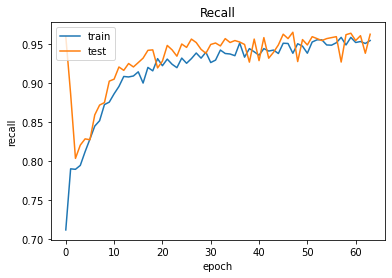

In [21]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
test_eval = model.evaluate(test, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

142/142 [==============================] - 19s 134ms/step
El modelo predice el  96.2293267250061 % de los datos


In [23]:
articulo_dir='D:/Documentos/Estudio/Maestría/Aprendizaje_Computacional/Implementacion/Deteccion_Articulo/dataset,solocovid,pneumonia'
#Para el conjunto del artículo
articulo_generator = train_datagen.flow_from_directory(
    articulo_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data
articulo=articulo_generator

Found 351 images belonging to 2 classes.


In [24]:
print('Utilizando el conjunto de datos del artículo para evaluar el modelo')
test_eval = model.evaluate(articulo, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

Utilizando el conjunto de datos del artículo para evaluar el modelo
11/11 [==============================] - 6s 534ms/step
El modelo predice el  80.05697727203369 % de los datos


In [48]:
history = model.fit_generator(train, steps_per_epoch=100, 
                              epochs=20,  
                              validation_data=val,   
                              validation_steps=50,  
                              verbose=1)

Epoch 1/20
100/100 [==============================] - 7s 68ms/step - loss: 0.3325 - accuracy: 0.9816 - f1_m: 0.9812 - precision_m: 0.9819 - recall_m: 0.9806 - val_loss: 0.3556 - val_accuracy: 0.9737 - val_f1_m: 0.9737 - val_precision_m: 0.9744 - val_recall_m: 0.9731
Epoch 2/20
100/100 [==============================] - 6s 65ms/step - loss: 0.3320 - accuracy: 0.9818 - f1_m: 0.9817 - precision_m: 0.9816 - recall_m: 0.9819 - val_loss: 0.3435 - val_accuracy: 0.9719 - val_f1_m: 0.9725 - val_precision_m: 0.9731 - val_recall_m: 0.9719
Epoch 3/20
100/100 [==============================] - 7s 67ms/step - loss: 0.3371 - accuracy: 0.9753 - f1_m: 0.9761 - precision_m: 0.9760 - recall_m: 0.9762 - val_loss: 0.3146 - val_accuracy: 0.9681 - val_f1_m: 0.9683 - val_precision_m: 0.9692 - val_recall_m: 0.9675
Epoch 4/20
100/100 [==============================] - 7s 65ms/step - loss: 0.3325 - accuracy: 0.9797 - f1_m: 0.9800 - precision_m: 0.9801 - recall_m: 0.9800 - val_loss: 0.3761 - val_accuracy: 0.9744 

In [49]:
print('Utilizando el conjunto de datos de test para evaluar el modelo')
test_eval = model.evaluate(test, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

Utilizando el conjunto de datos de test para evaluar el modelo
142/142 [==============================] - 5s 35ms/step
El modelo predice el  97.17750549316406 % de los datos


In [50]:
print('Utilizando el conjunto de datos de test para evaluar el modelo')
print('Loss: ',test_eval[0])
print('Accuracy: ',test_eval[1])
print('F1 Score: ',test_eval[2])
print('Precision: ',test_eval[3])
print('Recall: ',test_eval[4])

Utilizando el conjunto de datos de test para evaluar el modelo
Loss:  0.40270912647247314
Accuracy:  0.9717750549316406
F1 Score:  0.9719169735908508
Precision:  0.9740085601806641
Recall:  0.9698981642723083


In [51]:
print('Utilizando el conjunto de datos del artículo para evaluar el modelo')
test_eval = model.evaluate(articulo, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

Utilizando el conjunto de datos del artículo para evaluar el modelo
11/11 [==============================] - 4s 382ms/step
El modelo predice el  92.59259104728699 % de los datos


In [52]:
print('Utilizando el conjunto de datos del artículo para evaluar el modelo')
print('Loss: ',test_eval[0])
print('Accuracy: ',test_eval[1])
print('F1 Score: ',test_eval[2])
print('Precision: ',test_eval[3])
print('Recall: ',test_eval[4])

Utilizando el conjunto de datos del artículo para evaluar el modelo
Loss:  0.3510533571243286
Accuracy:  0.9259259104728699
F1 Score:  0.9259960651397705
Precision:  0.9260280728340149
Recall:  0.9260447025299072


In [53]:
print('180 eponchs')

180 eponchs


In [54]:
# Guardar el Modelo
model.save('modelVGG16Covidysanos.h5')

C:\Users\elium\.conda\envs\tfGPU\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [63]:
pred=model.predict(articulo)

In [68]:
#Aquí sólo hago con  un predict con el modelo y los datos del artículo
import numpy as np
suma=0
for i in range (351):
    if np.argmax(pred[i])==0:
        suma=suma+1
print(suma)

107
